<a href="https://colab.research.google.com/github/bonjovih/nyameme/blob/master/Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Exploratory Data Analysis (EDA) is the process of gaining a better understanding of data sets by summarizing and visualizing their primary properties. This stage is critical, particularly when it comes to modeling the data in order to apply Machine Learning. Histograms, Box plots, Scatter plots, and other plotting options are available in EDA. Exploring the data can take a long time. We can ask to define the problem statement or definition on our data set through the EDA procedure, which is very crucial.

**What Data are we exploring?**

In retail and consumer goods, short-term forecasting is critical. Many supply chain professionals can benefit from this excellent information with datasets drawn from https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification.

The dataset brings to fore Bob who has established his own mobile business. He wishes to compete with large corporations such as Apple and Samsung. He has no idea how to calculate the cost of the mobile phones that his company manufactures. In today's competitive mobile phone market, you can't just make assumptions. To overcome this problem, he collects sales data from multiple companies' mobile phones.

He is curious about the relationship between a mobile phone's features (such as RAM and internal memory) and its selling price. We use Machine Learning in resolving this issue. In this challenge, we must forecast a price range showing how high the price is rather than the real price. The following various steps are explored;






**1. Importing the required libraries for EDA**

Below are the libraries that are used in order to perform EDA (Exploratory data analysis).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**2. Loading the data into the data frame.**

As we can see, loading the data into the pandas data frame is one of the most crucial phases in EDA, as the values from the data set are comma-separated. All we have to do now is read the CSV into a data frame, and pandas will take care of the rest.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mobile Price Classification.csv to Mobile Price Classification.csv


In [4]:
df = pd.read_csv("Mobile Price Classification.csv")
# To display the top 5 rows 
df.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
df.tail(5)  # To display the bottom 5 rows

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


**3. Checking the Types of Data**

We check for datatypes here but in this scenario, the data is already in integer format.

In [6]:
df.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

**4. Dropping irrelevant Columns**

This step is essential in every EDA since there are occasions when we have a large number of columns that we never utilize; in these cases, dropping is the only option. The columns such as blue, fc, four_g, m_dep, pc, sc_h, sc_w, wifi, three_g, talk_time, px_height, px_width and touch_screen don't make sense to me in this scenario, so I just dropped it.

In [7]:
df = df.drop(['blue', 'fc', 'four_g', 'm_dep', 'pc', 'sc_h', 'sc_w', 'wifi', 'three_g', 'talk_time', 'px_height', 'px_width', 'touch_screen'], axis=1)
df.head(5)




,id,battery_power,clock_speed,dual_sim,int_memory,mobile_wt,n_cores,ram
0,1,1043,1.8,1,5,193,3,3476
1,2,841,0.5,1,61,191,5,3895
2,3,1807,2.8,0,27,186,3,2396
3,4,1546,0.5,1,25,96,8,3893
4,5,1434,1.4,0,49,108,6,1773


**5. Dropping the Duplicate Rows**

This is generally a useful thing to do because a large data collection, such as this one with over 10,000 rows, frequently has duplicate data that can be annoying, so I eliminate all duplicate values from the data-set. For example, I had 1000 rows of data before removing the duplicates, but after removing the duplicates, I had 10925 rows of data, indicating that I had 0 rows of duplicate data.

In [8]:
df.shape

(1000, 8)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


**6. Dropping the missing or null values.**

This stage is mostly similar to the preceding one, except that all missing values are recognized and later dropped. Now, this isn't the best solution because many people simply replace missing values with the column's mean or average, but in this situation, I simply dropped the missing numbers. This is due to the fact that there are no missing values. 

In [10]:
print(df.isnull().sum())

id               0
battery_power    0
clock_speed      0
dual_sim         0
int_memory       0
mobile_wt        0
n_cores          0
ram              0
dtype: int64


In [11]:
df = df.dropna()    # Dropping the missing values.
df.count()

id               1000
battery_power    1000
clock_speed      1000
dual_sim         1000
int_memory       1000
mobile_wt        1000
n_cores          1000
ram              1000
dtype: int64

**7. Detecting Outliers**

An outlier is a point or a group of points that are not like the others. They might be extremely high or extremely low at times. Detecting and removing outliers is frequently a good idea. Because outliers are one of the most common causes of a model's inaccuracy. As a result, it's a good idea to get rid of them. The technique I'll use to find and remove outliers is known as the IQR score technique. Outliers are frequently seen in box plot displays.

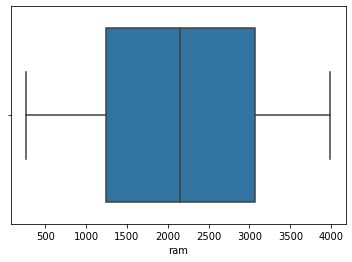

In [13]:
sns.boxplot(x=df['ram'])

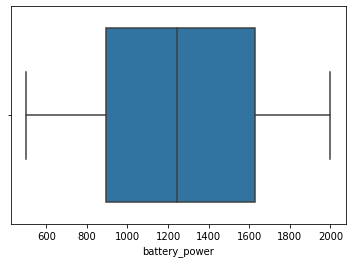

In [14]:
sns.boxplot(x=df['battery_power'])

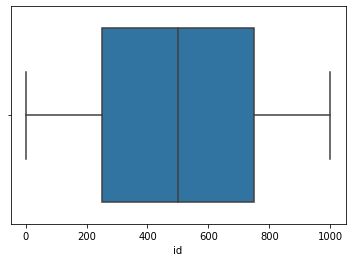

In [15]:
sns.boxplot(x=df['id'])

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                499.50
battery_power     734.25
clock_speed         1.60
dual_sim            1.00
int_memory         31.00
mobile_wt          60.25
n_cores             4.00
ram              1828.25
dtype: float64


In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1000, 8)

,id,battery_power,clock_speed,dual_sim,int_memory,mobile_wt,n_cores,ram
id,1.000000,-0.021511,0.035917,-0.002721,-0.014023,-0.007541,-0.015935,-0.043442
battery_power,-0.021511,1.000000,-0.039075,-0.061171,0.003751,-0.047065,0.025732,-0.032366
clock_speed,0.035917,-0.039075,1.000000,-0.012423,-0.030487,-0.014107,-0.012247,-0.000650
dual_sim,-0.002721,-0.061171,-0.012423,1.000000,-0.012158,-0.001734,-0.003129,0.048171
int_memory,-0.014023,0.003751,-0.030487,-0.012158,1.000000,-0.010447,0.021601,-0.007107
mobile_wt,-0.007541,-0.047065,-0.014107,-0.001734,-0.010447,1.000000,-0.038908,0.028786
n_cores,-0.015935,0.025732,-0.012247,-0.003129,0.021601,-0.038908,1.000000,-0.042750
ram,-0.043442,-0.032366,-0.000650,0.048171,-0.007107,0.028786,-0.042750,1.000000


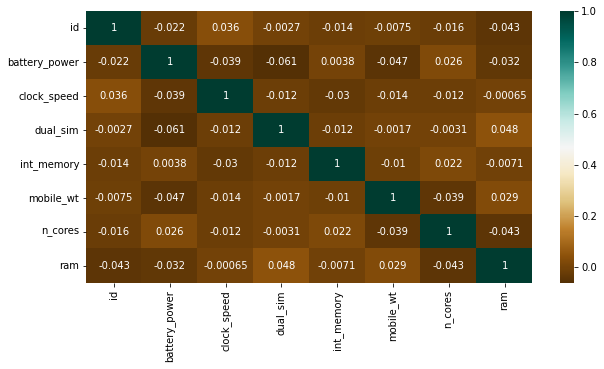

In [20]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

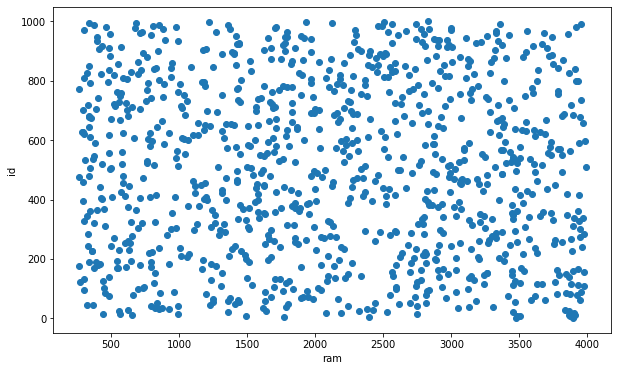

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['ram'], df['id'])
ax.set_xlabel('ram')
ax.set_ylabel('id')
plt.show() #Scatter plot

**[Using](https://)** **SVM**

In [24]:
from sklearn.svm import SVC
Mobile Price Classification.csv = datasets.csv()
X = Mobile Price Classification.csv.data[:, :2] # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
y = Mobile Price\ Classification.csv.target
print("Accuracy:",metrics.accuracy_score(y,y_pred))

**Using Naive Bayes**

In [ ]:
# load the Mobile Price Classification datasets
dataset = datasets.load Mobile Price Classification()
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))